In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import os
import numpy as np
import matplotlib.pyplot as plt
import math


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [ ]:
batch_size = 100
epochs = 10
IMG_HEIGHT = 128
IMG_WIDTH = 128
SEED = 1337

train_image_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)


train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size = 20,
    class_mode='binary')

val_data_gen = train_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size = 20,
    class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(
    directory = PATH,
    classes = ['test'],
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [ ]:
model = Sequential()
#Convolutional Base
model.add(Conv2D(16,3,activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPooling2D(2))

model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D(2))

#Classifier
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)            

In [ ]:
import math

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=100,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 53s 525ms/step - loss: 0.7171 - accuracy: 0.5262 - val_loss: 0.6721 - val_accuracy: 0.5200
Epoch 2/10
100/100 [==============================] - 52s 517ms/step - loss: 0.6699 - accuracy: 0.5745 - val_loss: 0.6476 - val_accuracy: 0.6200
Epoch 3/10
100/100 [==============================] - 52s 515ms/step - loss: 0.6401 - accuracy: 0.6316 - val_loss: 0.6308 - val_accuracy: 0.6400
Epoch 4/10
100/100 [==============================] - 51s 514ms/step - loss: 0.5909 - accuracy: 0.6832 - val_loss: 0.6468 - val_accuracy: 0.6410
Epoch 5/10
100/100 [==============================] - 52s 519ms/step - loss: 0.5752 - accuracy: 0.6739 - val_loss: 0.6088 - val_accuracy: 0.6690
Epoch 6/10
100/100 [==============================] - 52s 516ms/step - loss: 0.5436 - accuracy: 0.7233 - val_loss: 0.5976 - val_accuracy: 0.6830
Epoch 7/10
100/100 [==============================] - 52s 516ms/step - loss: 0.5256 - accuracy: 0.7312 - val_loss: 0.5623 - val_ac

In [ ]:
acc = history.history['accuracy']
print(len(acc))
val_acc = history.history['val_accuracy']
print(len(val_acc))

10
10


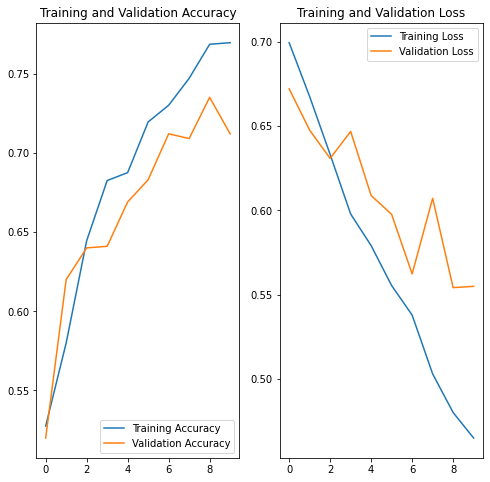

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
probabilities = model.predict(test_data_gen)
print(probabilities)

In [ ]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)*100}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print('\n')
test_image=load_img('/content/drive/My Drive/kopek.jpg', target_size=(128,128))
plt.imshow(test_image)

test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0) 
result = model.predict(test_image, batch_size=1)

if result==1:
  plt.title('Dog')
else:
  plt.title('Cat')